# Oak Wilt Cluster Spread Analysis

This notebook analyzes the spread rate (ft/year) of Oak Wilt clusters and visualizes the distribution.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set style
sns.set_theme(style="whitegrid")

In [21]:
# Load the data
# Adjust path as needed based on notebook location
data_path = "../../../data/oak_wilt_cluster_features.csv" 

try:
    df = pd.read_csv(data_path)
    
    # Convert km/year to ft/year (1 km = 3280.84 ft)
    df['spread_rate_ft_per_year'] = df['spread_rate_km_per_year'] * 3280.84
    
    # Filter outliers (20 <= spread <= 200)
    original_len = len(df)
    df = df[(df['spread_rate_ft_per_year'] >= 20) & (df['spread_rate_ft_per_year'] <= 200)]
    print(f"Filtered out {original_len - len(df)} outliers. Remaining: {len(df)} clusters.")
    
    display(df.head())
except FileNotFoundError:
    print(f"File not found at {data_path}. Please check the path.")

Filtered out 6 outliers. Remaining: 58 clusters.


,cluster_id,original_label,point_count,unique_years,start_year,end_year,year_span,annual_counts,centroid_lat,centroid_lon,...,area_km2,point_density_per_km2,spread_rate_km_per_year,dominant_species,dominant_landowner,eps_m,temporal_scale_m,min_samples,min_unique_years,spread_rate_ft_per_year
0,1,0,3,2,1989,1990,1,"{""1989"": 1, ""1990"": 2}",30.296167,-97.777288,...,0.003490,859.629732,0.033330,Live Oak,Unknown,80.0,20.0,3,2,109.349054
1,3,4,6,5,1992,1999,7,"{""1992"": 1, ""1993"": 1, ""1995"": 2, ""1997"": 1, ""...",30.245315,-97.825583,...,0.010616,565.201686,0.008304,Live Oak,Unknown,80.0,20.0,3,2,27.244948
2,5,7,3,2,1994,1995,1,"{""1994"": 1, ""1995"": 2}",30.420323,-97.730320,...,0.000675,4447.490034,0.014653,Live Oak,Unknown,80.0,20.0,3,2,48.074331
3,6,8,4,2,1995,1998,3,"{""1995"": 3, ""1998"": 1}",30.391900,-97.762879,...,0.003287,1217.021911,0.010782,Live Oak,Unknown,80.0,20.0,3,2,35.372818
4,8,10,9,6,1996,2001,5,"{""1996"": 3, ""1997"": 1, ""1998"": 1, ""1999"": 1, ""...",30.239693,-97.852532,...,0.019313,466.019397,0.015681,Live Oak,Unknown,80.0,20.0,3,2,51.446919


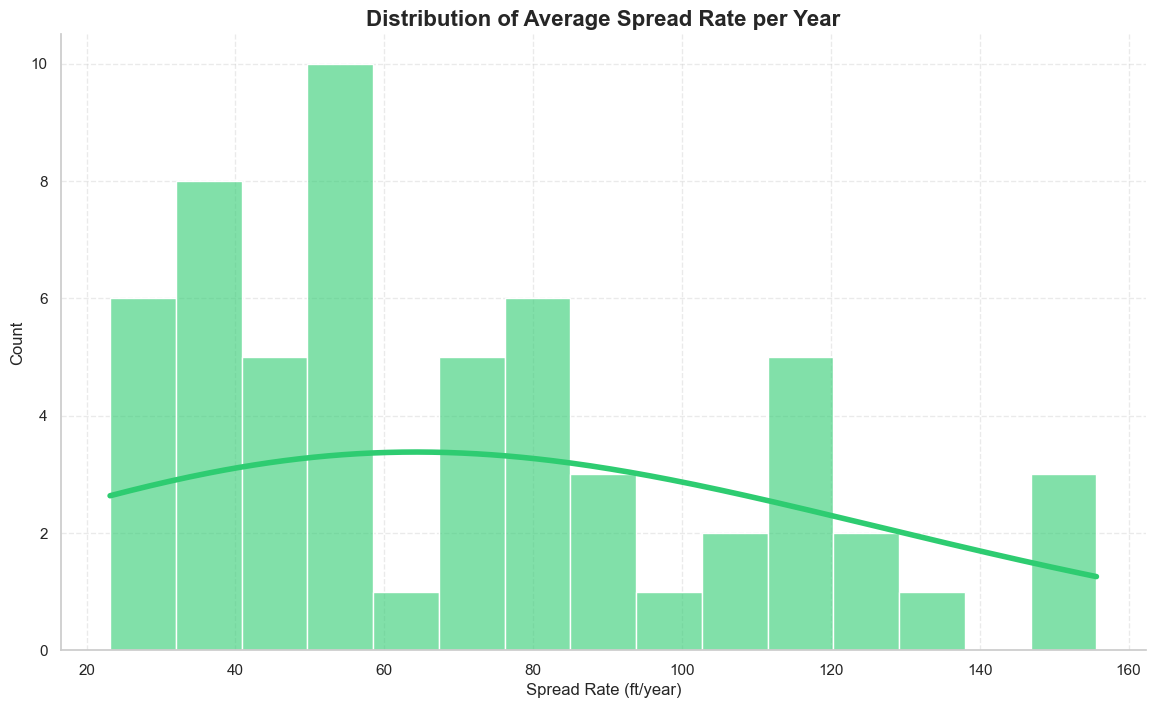

In [ ]:
# Plot histogram of spread_rate_ft_per_year

plt.figure(figsize=(14, 8))

sns.histplot(
    data=df, 
    x='spread_rate_ft_per_year', 
    kde=True, 
    bins=15, 
    color='#2ecc71', 
    alpha=0.6, 
    line_kws={'linewidth': 4},
    kde_kws={'bw_adjust': 3}
)
plt.title('Distribution of Average Spread Rate per Year', fontsize=16, fontweight='bold')
plt.xlabel('Spread Rate (ft/year)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
sns.despine()
plt.show()

In [23]:
# Basic statistics
stats = df['spread_rate_ft_per_year'].describe()
print("Statistics for Spread Rate (ft/year):")
print(stats)

Statistics for Spread Rate (ft/year):
count     58.000000
mean      71.264837
std       36.298463
min       23.154510
25%       42.192090
50%       61.626681
75%       87.210388
max      155.686993
Name: spread_rate_ft_per_year, dtype: float64
